#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [143]:
# Read CSV
df=pd.read_csv("https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv")
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [144]:
df.duplicated().any()

True

Remove Duplicate

In [145]:
df=df.drop_duplicates()

Periksa apakah ada missing values

In [146]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Periksa outlier dengan boxplot untuk setiap kolom feature

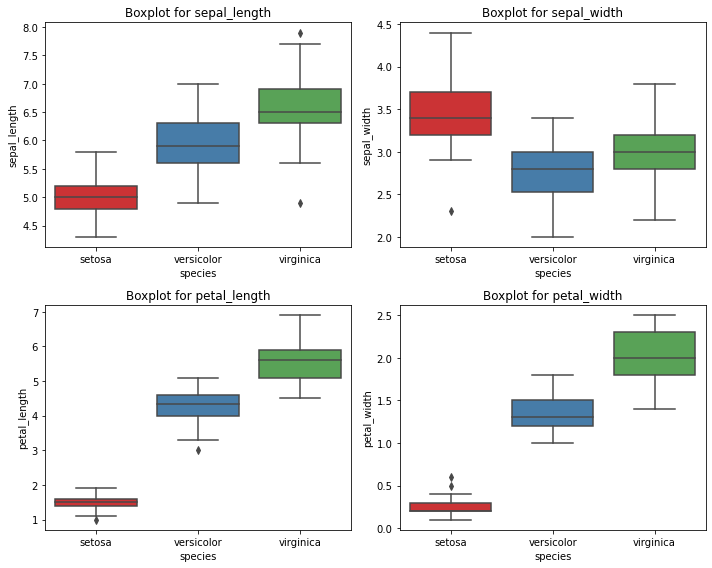

In [147]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Loop untuk membuat boxplot dari setiap kolom dan menempatkannya di subplot
for i, colu in enumerate(df.columns[:-1]):  # Mengabaikan kolom 'species'
    row = i // 2
    col = i % 2
    
    sns.boxplot(data=df, x='species', y=colu, palette='Set1', ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot for {colu}')

# Menampilkan gambar
plt.tight_layout()
plt.show()

Remove Outliers

In [148]:
def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)  # Kuartil 1
    Q3 = data[col].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang antar kuartil (Interquartile Range)
    lower_bound = Q1 - 1.5 * IQR  # Batas bawah
    upper_bound = Q3 + 3 * IQR  # Batas atas
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# # Menghapus outlier dari kolom 'area_worst'
# df_new = remove_outliers(df_new, 'area_worst')

# # Menghapus outlier dari kolom 'area_mean'
# df_new = remove_outliers(df_new, 'area_mean')
columnss=df.drop(['species'],axis=1).columns
for col in(columnss):
    df=remove_outliers(df, col)

In [149]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Pisahkan dataset menjadi variabel independen dan variabel dependen

In [150]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [151]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [153]:
model=LogisticRegression(random_state=0)
model.fit(X_train,y_train)

LogisticRegression(random_state=0)

Uji model dengan dataset test

In [154]:
predic=model.predict(X_test)
print(predic)

['setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'versicolor']


In [155]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, predic)

print("Confusion Matrix:")
print(cm)

# Menghitung accuracy score
accuracy = accuracy_score(y_test, predic)

# Menampilkan accuracy score
print('Accuracy Score:', accuracy)

Confusion Matrix:
[[7 0 0]
 [0 4 0]
 [0 0 4]]
Accuracy Score: 1.0


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [156]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

Uji hasil model dengan data test

In [157]:
y_pred_nb=nb_model.predict(X_test)
print(y_pred_nb)

['setosa' 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor'
 'setosa' 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'virginica'
 'virginica' 'versicolor']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [158]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:")
print(cm_nb)


accuracy_nb = accuracy_score(y_test, y_pred_nb)
print('Accuracy Score:', accuracy_nb)

Confusion Matrix:
[[6 1 0]
 [0 3 1]
 [0 0 4]]
Accuracy Score: 0.8666666666666667


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [159]:
knn_model = KNeighborsClassifier( metric='euclidean')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [160]:
y_pred_knn=knn_model.predict(X_test)
print(y_pred_knn)

['setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'versicolor']


Ukur akurasi dari model K-Nearest Neighbor

In [161]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(cm_knn)


accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy Score:', accuracy_knn)

Confusion Matrix:
[[7 0 0]
 [0 4 0]
 [0 0 4]]
Accuracy Score: 1.0


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah Logistic Regression dan KNN